In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.4 MB/s eta 0:00:00


In [ ]:
import mne
import numpy
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
file = "drive//MyDrive//RAW//edf_export//data_001.edf"
data = mne.io.read_raw_edf(file)

info = data.info
channels = data.ch_names
size = os.path.getsize(file)
data
#print('Size of file is', size, 'bytes')

Extracting EDF parameters from /content/drive/MyDrive/RAW/edf_export/data_001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | data_001.edf, 4 x 128750 (1030.0 s), ~9 kB, data not loaded>

In [ ]:
channels

['ch1_LF5-FpZ', 'ch2_OTE_L-FpZ', 'ch4_RF6-FpZ', 'ch5_OTE_R-FpZ']

Effective window size : 2.048 (s)


<ipython-input-7-c5ac1e9a7244>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.compute_psd().plot()


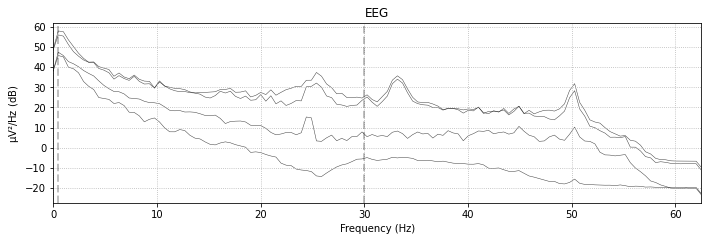

In [ ]:
data.compute_psd().plot()

In [ ]:
from scipy.fft import fft, dct
import math
import matplotlib.pyplot as plt
import numpy as np

EEG_raw_data = data.get_data()

**VISUALIZATION OF CHANNEL 1 DATA**

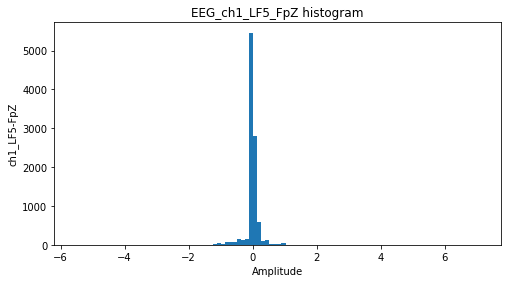

In [ ]:
SCALE=1e3
raw_data= EEG_raw_data*SCALE
MAX_LENGTH=10000
DATA_OFFSET=2000;     # data offset
N_HIST_BIN=100
#EEG channel 1
channel_id=0



plt.subplot(2,1,1)
plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("EEG_ch1_LF5_FpZ")
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("EEG_ch1_LF5_FpZ histogram")
plt.rcParams["figure.figsize"] = (8,9)
plt.show()

**VISUALIZATION OF CHANNEL 2 DATA**

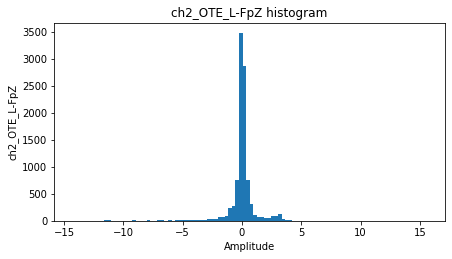

In [ ]:
channel_id = 1
plt.subplot(2,1,1)
plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch2_OTE_L-FpZ");
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch2_OTE_L-FpZ histogram");
plt.rcParams["figure.figsize"] = (7,8)
plt.show()

**VISUALIZATION OF CHANNEL 3 DATA**

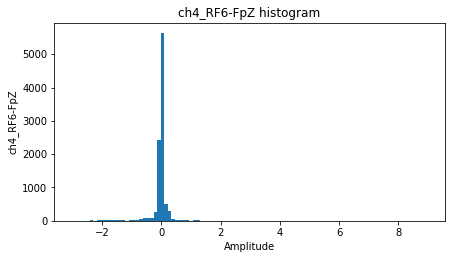

In [ ]:
channel_id = 2

# plt.plot(raw_data[channel_id,1:MAX_LENGTH])
# plt.ylabel(channels[channel_id])
# plt.xlabel("samples")
# plt.title("ch4_RF6-FpZ")
# plt.rcParams["figure.figsize"] = (7,6)
# plt.show()

plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch4_RF6-FpZ histogram")
plt.rcParams["figure.figsize"] = (7,8)
plt.show()

**VISUALIZATION OF CHANNEL 4 DATA**

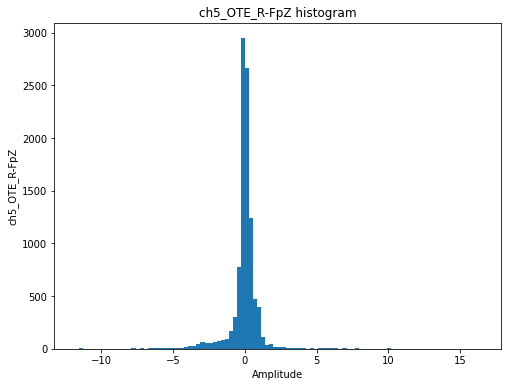

In [ ]:
channel_id = 3

# plt.plot(raw_data[channel_id,1:MAX_LENGTH])
# plt.ylabel(channels[channel_id])
# plt.xlabel("samples")
# plt.title("ch5_OTE_R-FpZ")
# plt.rcParams["figure.figsize"] = (8,6)
# plt.show()

#plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch5_OTE_R-FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 5 DATA**

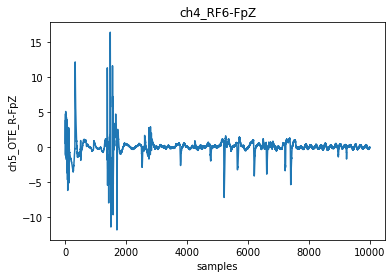

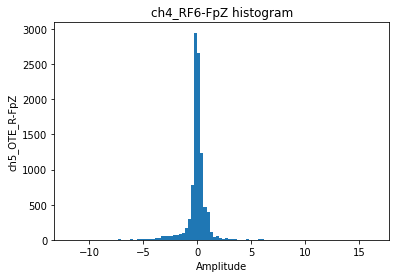

In [ ]:
channel_id = 3

plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch4_RF6-FpZ");
plt.show()

#plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch4_RF6-FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 6 DATA**

In [ ]:
channel_id = 3

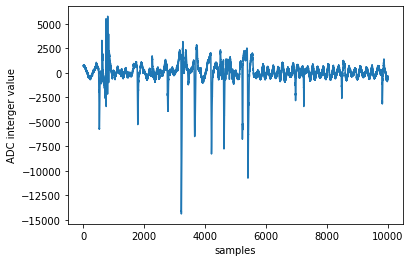

80096


In [ ]:
EEG_MAX=0.01
x=np.round(raw_data[channel_id,DATA_OFFSET:DATA_OFFSET-1+MAX_LENGTH]/EEG_MAX*(2^23-1))
plt.plot(x)
plt.ylabel("ADC interger value")

plt.xlabel("samples")
plt.show()
import sys
print(sys.getsizeof(x))

# **Golomb Code**

**Differential Signal compression**

In [ ]:
import math
import time
# Golomb Code
# channel 2 and 5 are not used
# start compression
#Preparation

start = time.time()  #start time


N= 1000    # 1000;
b=9
M=math.pow(2,b)         # Golomb parameter
codeStream=""
codeStream_debug=""
#Step 1: calculate the differential
y=x[0:N-1]-x[1:N]
z=[0]*N
r=[0]*N
q=[0]*N
# Step 2: Convert to all positive values
for k in range (N-1):
    if y[k]>=0 :
        z[k]=2*y[k]
    else :
        z[k]=-2*y[k]-1
    # Step 3: Golomb code

    #def golomb(codeword,m):
    c = int(math.ceil(math.log(M,2)))  # for the formulas refer wikipedia page link in the readme file
    #calculate quotient, remainder
    r[k] = int(z[k]%M)
    q[k] = int(math.floor(z[k]/M))

    div = int(math.pow(2,c)-M)

    #Step 4.1: quotient is put in unary code
    quotientBit = ""
    remainderBit=""
    a=""
    for i in range(q[k]):
        quotientBit = quotientBit + "1"
    quotientBit = quotientBit + "0"
    #     print("First:",first)
    #Step 4.2: remainder is in binary mode
    if r[k] < div:
        b = c-1
        a = "{0:0" + str(b) + "b}"
        #print("1",a.format(r[k]))
        remainderBit = a.format(r[k])
    else:
        b = c
        a = "{0:0" + str(b) + "b}"
        #print("2",a.format(r[k] + div))
        remainderBit = a.format(r[k] + div)

    codeStream_debug = codeStream_debug + quotientBit + "."+ remainderBit +"|"
    codeStream = codeStream + quotientBit + remainderBit


end = time.time()

"""
plt.plot(y)
plt.ylabel("level")
plt.xlabel("samples")
plt.title("differential signal");
plt.show()

plt.plot(z)
plt.ylabel("level")
plt.xlabel("samples")
plt.title("positive signal");
plt.show()

"""
print("Golomb code parameter:",M)
print("Number of samples:",N, " and number of bits:", N*24);
print("Length of compressed data", len(codeStream)+24)
print("Code rate:",(len(codeStream)+24)/(N*24))
print(f"the time consumption {end-start}")

if ((len(codeStream)+24)/(N*24) > 1):
  print("compression ratio is not good")
else:
  print("compression ratio is ok")

Golomb code parameter: 512.0
Number of samples: 1000  and number of bits: 24000
Length of compressed data 10330
Code rate: 0.43041666666666667
the time consumption 0.009394407272338867
compression ratio is ok


In [ ]:
print(codeStream_debug)
print(codeStream)

0.001010011|0.001010111|0.100101100|0.000111001|0.000101001|0.001111001|0.001010001|0.101001000|0.000110001|0.000011111|0.001110001|0.001111101|0.011111100|0.001000011|0.000000001|0.001111011|0.001110001|0.100110110|0.000110001|0.000001011|0.001100111|0.001101111|0.100010100|0.000111111|0.000011011|0.001101101|0.001010101|0.100110010|0.000110101|0.000010000|0.000100101|0.000011001|0.101010100|0.001000111|0.000110101|0.001010011|0.001000111|0.100101010|0.001000011|0.000010011|0.000111001|0.001000101|0.100001010|0.000111011|0.000001110|0.001010001|0.000110001|0.100101110|0.001000001|0.000000011|0.010111101|0.010111111|0.011100100|0.000101101|0.000111110|0.010001011|0.010001111|0.100011100|0.000111010|0.001111100|0.010000101|0.001011101|0.101000000|0.000110000|0.001111100|0.010111101|0.010110011|0.011110000|0.000100011|0.001001000|0.010110001|0.010011011|0.011110000|0.000000110|0.001111110|0.010101101|0.010011101|0.011111110|0.000010100|0.001101100|0.011000111|0.010000111|0.011111110|0.00

**Decompression**

In [ ]:
Q_read = 1
R_read = 0

q_part = ""
r_part = ""

q_val = []
r_val = []


counter = 9 #this is the golomb remainder parametere which is the lenght of the remainder

for i in codeStream:
  if (Q_read == 1 and i == '1'):
    q_part = q_part + '1'
  if (Q_read == 1 and i == '0'):
    q_val.append(q_part)
    q_part = ""
    # q_part = q_part + '0'
    # q_val.append(q_part)
    R_read = 1
    Q_read = 0
    continue
  if (R_read and counter >0):
    r_part = r_part + i
    counter = counter -1
    if (counter ==0):
      r_val.append(r_part)
      r_part = ""
      R_read = 0
      Q_read = 1
      counter = 9 ## again ssetting it to the proper value (remainder this values setting must be done properly otherwise results would be fatal)

In [ ]:
print(codeStream_debug)
print(q_val)
print(r_val)

0.001010011|0.001010111|0.100101100|0.000111001|0.000101001|0.001111001|0.001010001|0.101001000|0.000110001|0.000011111|0.001110001|0.001111101|0.011111100|0.001000011|0.000000001|0.001111011|0.001110001|0.100110110|0.000110001|0.000001011|0.001100111|0.001101111|0.100010100|0.000111111|0.000011011|0.001101101|0.001010101|0.100110010|0.000110101|0.000010000|0.000100101|0.000011001|0.101010100|0.001000111|0.000110101|0.001010011|0.001000111|0.100101010|0.001000011|0.000010011|0.000111001|0.001000101|0.100001010|0.000111011|0.000001110|0.001010001|0.000110001|0.100101110|0.001000001|0.000000011|0.010111101|0.010111111|0.011100100|0.000101101|0.000111110|0.010001011|0.010001111|0.100011100|0.000111010|0.001111100|0.010000101|0.001011101|0.101000000|0.000110000|0.001111100|0.010111101|0.010110011|0.011110000|0.000100011|0.001001000|0.010110001|0.010011011|0.011110000|0.000000110|0.001111110|0.010101101|0.010011101|0.011111110|0.000010100|0.001101100|0.011000111|0.010000111|0.011111110|0.00

In [ ]:
for i in range(len(q_val)):
  if (q_val[i] == ''):
    q_val[i] = '0'

print(q_val)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
Q_vals_Decimals = []
for i in q_val:
  if (i == '0'):
    Q_vals_Decimals.append(0)
  else:
    Q_vals_Decimals.append(len(i))

print(Q_vals_Decimals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
r_val_Decimal = []
for i in r_val:
  r_val_Decimal.append(int(i,2))

print(r_val_Decimal)

[83, 87, 300, 57, 41, 121, 81, 328, 49, 31, 113, 125, 252, 67, 1, 123, 113, 310, 49, 11, 103, 111, 276, 63, 27, 109, 85, 306, 53, 16, 37, 25, 340, 71, 53, 83, 71, 298, 67, 19, 57, 69, 266, 59, 14, 81, 49, 302, 65, 3, 189, 191, 228, 45, 62, 139, 143, 284, 58, 124, 133, 93, 320, 48, 124, 189, 179, 240, 35, 72, 177, 155, 240, 6, 126, 173, 157, 254, 20, 108, 199, 135, 254, 3, 158, 137, 165, 202, 2, 154, 187, 149, 276, 54, 192, 139, 129, 246, 38, 200, 175, 177, 210, 18, 154, 205, 179, 182, 10, 200, 177, 161, 208, 12, 198, 169, 167, 190, 38, 212, 173, 131, 208, 14, 222, 147, 161, 162, 2, 206, 179, 167, 154, 22, 230, 217, 195, 164, 5, 212, 189, 187, 126, 14, 278, 159, 157, 164, 24, 286, 135, 129, 178, 56, 312, 123, 151, 134, 28, 244, 189, 143, 118, 26, 318, 177, 221, 60, 53, 240, 147, 141, 120, 32, 302, 173, 211, 32, 37, 270, 169, 163, 76, 15, 282, 139, 135, 74, 4, 286, 211, 187, 22, 61, 286, 113, 113, 14, 25, 338, 83, 85, 3, 59, 310, 91, 77, 15, 31, 340, 111, 101, 67, 81, 382, 67, 99, 47, 73

In [ ]:
decompressed_data = []
for i in range(999):
  decompressed_data.append(512 * Q_vals_Decimals[i] + r_val_Decimal[i])

print(z)
print(decompressed_data)

[83.0, 87.0, 300.0, 57.0, 41.0, 121.0, 81.0, 328.0, 49.0, 31.0, 113.0, 125.0, 252.0, 67.0, 1.0, 123.0, 113.0, 310.0, 49.0, 11.0, 103.0, 111.0, 276.0, 63.0, 27.0, 109.0, 85.0, 306.0, 53.0, 16.0, 37.0, 25.0, 340.0, 71.0, 53.0, 83.0, 71.0, 298.0, 67.0, 19.0, 57.0, 69.0, 266.0, 59.0, 14.0, 81.0, 49.0, 302.0, 65.0, 3.0, 189.0, 191.0, 228.0, 45.0, 62.0, 139.0, 143.0, 284.0, 58.0, 124.0, 133.0, 93.0, 320.0, 48.0, 124.0, 189.0, 179.0, 240.0, 35.0, 72.0, 177.0, 155.0, 240.0, 6.0, 126.0, 173.0, 157.0, 254.0, 20.0, 108.0, 199.0, 135.0, 254.0, 3.0, 158.0, 137.0, 165.0, 202.0, 2.0, 154.0, 187.0, 149.0, 276.0, 54.0, 192.0, 139.0, 129.0, 246.0, 38.0, 200.0, 175.0, 177.0, 210.0, 18.0, 154.0, 205.0, 179.0, 182.0, 10.0, 200.0, 177.0, 161.0, 208.0, 12.0, 198.0, 169.0, 167.0, 190.0, 38.0, 212.0, 173.0, 131.0, 208.0, 14.0, 222.0, 147.0, 161.0, 162.0, 2.0, 206.0, 179.0, 167.0, 154.0, 22.0, 230.0, 217.0, 195.0, 164.0, 5.0, 212.0, 189.0, 187.0, 126.0, 14.0, 278.0, 159.0, 157.0, 164.0, 24.0, 286.0, 135.0, 129.

In [ ]:
new_z = []
for i in range(len(decompressed_data)):
  new_z.append(int(z[i]))

for i in range(len(new_z)):
  if (new_z[i] != decompressed_data[i]):
    print("error")

# **RAW Signal compression**

In [ ]:
start = time.time()
N= 1000    # 1000;
b= 9
M=math.pow(2,b)         # Golomb parameter
codeStream=""
codeStream_debug=""
for k in range (N-1):

  c = int(math.ceil(math.log(M,2)))  # for the formulas refer wikipedia page link in the readme file
    #calculate quotient, remainder
  r[k] = int(x[k]%M)
  q[k] = int(math.floor(x[k]/M))

  div = int(math.pow(2,c)-M)

    #Step 4.1: quotient is put in unary code
  quotientBit = ""
  remainderBit=""
  a=""
  for i in range(q[k]):
       quotientBit = quotientBit + "1"
  quotientBit = quotientBit + "0"
    #     print("First:",first)
    #Step 4.2: remainder is in binary mode
  if r[k] < div:
       b = c-1
       a = "{0:0" + str(b) + "b}"
        #print("1",a.format(r[k]))
       remainderBit = a.format(r[k])
  else:
      b = c
      a = "{0:0" + str(b) + "b}"
        #print("2",a.format(r[k] + div))
      remainderBit = a.format(r[k] + div)

  codeStream_debug = codeStream_debug + quotientBit + "."+ remainderBit +"|"
  codeStream = codeStream + quotientBit + remainderBit

end = time.time()

print("Golomb code parameter:",M)
print("Number of samples:",N, " and number of bits:", N*24);
print("Length of compressed data", len(codeStream)+24)
print("Code rate:",(len(codeStream)+32)/(N*32))
print(f"the time consumption {end-start}")

if ((len(codeStream)+24)/(N*24) > 1):
  print("compression ratio is not good")
else:
  print("compression ratio is ok")


Golomb code parameter: 512.0
Number of samples: 1000  and number of bits: 24000
Length of compressed data 10612
Code rate: 0.331875
the time consumption 0.008327245712280273
compression ratio is ok


**Decompression**

In [ ]:
Q_read = 1
R_read = 0

q_part = ""
r_part = ""

q_val = []
r_val = []


counter = 9 #this is the golomb remainder parametere which is the lenght of the remainder

for i in codeStream:
  if (Q_read == 1 and i == '1'):
    q_part = q_part + '1'
  if (Q_read == 1 and i == '0'):
    q_val.append(q_part)
    q_part = ""
    # q_part = q_part + '0'
    # q_val.append(q_part)
    R_read = 1
    Q_read = 0
    continue
  if (R_read and counter >0):
    r_part = r_part + i
    counter = counter -1
    if (counter ==0):
      r_val.append(r_part)
      r_part = ""
      R_read = 0
      Q_read = 1
      counter = 9 ## again ssetting it to the proper value (remainder this values setting must be done properly otherwise results would be fatal)

In [ ]:
print(codeStream_debug)
print(q_val)
print(r_val)

10.011010101|10.011111111|10.100101011|10.010010101|10.010110010|10.011000111|10.100000100|10.100101101|10.010001001|10.010100010|10.010110010|10.011101011|10.100101010|10.010101100|10.011001110|10.011001111|10.100001101|10.101000110|10.010101011|10.011000100|10.011001010|10.011111110|10.100110110|10.010101100|10.011001100|10.011011010|10.100010001|10.100111100|10.010100011|10.010111110|10.010110110|10.011001001|10.011010110|10.000101100|10.001010000|10.001101011|10.010010101|10.010111001|10.000100100|10.001000110|10.001010000|10.001101101|10.010010000|10.000001011|10.000101001|10.000100010|10.001001011|10.001100100|0.111001101|0.111101110|0.111110000|10.001001111|10.010101111|10.000111101|10.001010100|10.000110101|10.001111011|10.011000011|10.000110101|10.000011000|0.111011010|10.000011101|10.001001100|0.110101100|0.110010100|0.101010110|0.110110101|10.000001111|0.110010111|0.110101001|0.110000101|0.111011110|10.000101100|0.110110100|0.110110001|0.101110010|0.111001001|10.000011000|0.

In [ ]:
for i in range(len(q_val)):
  if (q_val[i] == ''):
    q_val[i] = '0'

print(q_val)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
Q_vals_Decimals = []
for i in q_val:
  if (i == '0'):
    Q_vals_Decimals.append(0)
  else:
    Q_vals_Decimals.append(len(i))

print(Q_vals_Decimals)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
r_val_Decimal = []
for i in r_val:
  r_val_Decimal.append(int(i,2))

print(r_val_Decimal)

[213, 255, 299, 149, 178, 199, 260, 301, 137, 162, 178, 235, 298, 172, 206, 207, 269, 326, 171, 196, 202, 254, 310, 172, 204, 218, 273, 316, 163, 190, 182, 201, 214, 44, 80, 107, 149, 185, 36, 70, 80, 109, 144, 11, 41, 34, 75, 100, 461, 494, 496, 79, 175, 61, 84, 53, 123, 195, 53, 24, 474, 29, 76, 428, 404, 342, 437, 15, 407, 425, 389, 478, 44, 436, 433, 370, 457, 24, 409, 399, 345, 445, 1, 386, 388, 309, 378, 461, 360, 359, 282, 376, 451, 313, 286, 190, 260, 325, 202, 183, 83, 171, 260, 155, 146, 69, 172, 262, 171, 166, 66, 155, 236, 132, 126, 27, 112, 196, 101, 82, 488, 63, 129, 25, 18, 419, 493, 62, 493, 492, 389, 479, 51, 486, 475, 360, 469, 55, 485, 488, 382, 477, 59, 508, 501, 362, 442, 9, 439, 427, 284, 352, 417, 328, 300, 144, 206, 282, 215, 201, 79, 174, 246, 187, 174, 15, 104, 215, 185, 212, 92, 166, 237, 177, 161, 10, 97, 203, 187, 206, 71, 156, 238, 200, 208, 67, 137, 205, 168, 166, 23, 129, 223, 212, 243, 100, 157, 214, 207, 220, 51, 93, 136, 138, 168, 13, 59, 98, 106, 122

In [ ]:
decompressed_data = []
for i in range(999):
  decompressed_data.append(512 * Q_vals_Decimals[i] + r_val_Decimal[i])

print(x)
print(decompressed_data)

[ 725.  767.  811. ... -389. -286. -590.]
[725, 767, 811, 661, 690, 711, 772, 813, 649, 674, 690, 747, 810, 684, 718, 719, 781, 838, 683, 708, 714, 766, 822, 684, 716, 730, 785, 828, 675, 702, 694, 713, 726, 556, 592, 619, 661, 697, 548, 582, 592, 621, 656, 523, 553, 546, 587, 612, 461, 494, 496, 591, 687, 573, 596, 565, 635, 707, 565, 536, 474, 541, 588, 428, 404, 342, 437, 527, 407, 425, 389, 478, 556, 436, 433, 370, 457, 536, 409, 399, 345, 445, 513, 386, 388, 309, 378, 461, 360, 359, 282, 376, 451, 313, 286, 190, 260, 325, 202, 183, 83, 171, 260, 155, 146, 69, 172, 262, 171, 166, 66, 155, 236, 132, 126, 27, 112, 196, 101, 82, 488, 63, 129, 25, 18, 419, 493, 62, 493, 492, 389, 479, 51, 486, 475, 360, 469, 55, 485, 488, 382, 477, 59, 508, 501, 362, 442, 9, 439, 427, 284, 352, 417, 328, 300, 144, 206, 282, 215, 201, 79, 174, 246, 187, 174, 15, 104, 215, 185, 212, 92, 166, 237, 177, 161, 10, 97, 203, 187, 206, 71, 156, 238, 200, 208, 67, 137, 205, 168, 166, 23, 129, 223, 212, 243, 100,

# **can not perform golomb coding on raw data as it is errornous due to the negative vlaues**